# CSc 74020 Machine Learning Week 5
# (Linear) Support Vector Machines

**Support Vector Machine** (SVM) used to be one of the most popular models in Machine Learning. It is capable of performing linear or nonlinear classification, regression, and even outlier detection (One-class SVM). This lecture will explain the core concepts of SVMs, how to use them, and how they work.

Reading: Chapter 5, "Hands-on machine learning with scikit-learn keras and tensorflow"

**Big thank you to Professor Liang Zhao for the material in this workbook**

## Plotting Functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Task 1: Linear SVM with Hard Margin
- Each data example has two features: $x_1$ and $x_2$. Using them as coordinates, they can be visualized as a data point on the coordinate plane.
- Binary classification: target value $y = 1$ means that the instance belongs to a certain class (class 1); $y = -1$ means that the instance belongs to another class (class -1).
- Classes are linearly separable: The two classes can clearly be separrated with a straight line.
- The goal is to find a straight line that best separates the two classes perfectly (no mis-classification is allowed).
- The best straight line that separates the two classes is the one with maximized distance from it to the nearest data point on each class.

<img src="https://github.com/ch00226855/CMP464-788-Spring2019/raw/master/Data/SVM1.png">

In the above graph, there are three lines (H1, H2, H3) that try to separate black dots from white dots.
- H1 is clearly bad because it doesn't even separate the two classes properly.
- H2 separates the two classes perfectly, but it is so close to the data points that it will probably not perform well on new instances.
- H3 not only separates the two classes but also stays as far away from the closest training instances as possible. It is reasonable to believe that H3 will generalize well on new instances.

<img src="https://github.com/ch00226855/CMP464-788-Spring2019/raw/master/Data/SVM2.jpeg">

Notice that adding more training instances "off the street" will not affect the decision boundary at all: it is fully determined (or "supported") by the instances located on the edge of the street. These instances are called the **support vectors**.

SVMs are sensitive to the feature scales, so proper feature scaling is necessary for obtaining a good decision boundary.

### Express an SVM model with three parallel lines

We can use three lines to expression the above binary classifier:

- $w_1x_1 + w_2x_2 + b = 0$ represents the line in the middle of the gap.
- $w_1x_1 + w_2x_2 + b = 1$ represents the right boundary of the gap.
- $w_1x_1 + w_2x_2 + b = -1$ represents the left boundary of the gap.

The parameters of this model are $w_1(\ge 0), w_2, b$. To avoid ambiguity, we choose $w_1$ to be non-negative. Here all three lines share the same slope w because they are parallel.

- For any point $(x_1, x_2)$ on the right half plane divided by the central line, the expression $w_1x_1 + w_2x_2 + b$ is positive.
- For any point $(x_1, x_2)$ on the left half plane, $w_1x_1 + w_2x_2 + b$ is negative.

**Question**: How to compute the slope of these lines?


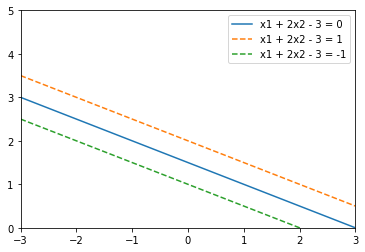

In [2]:
# Suppose w1 = 1, w2 = 2, and b = -3, draw the above
# three lines on a graph.

# 1. plot the center line: x1 + 2x2 - 3 = 0.
list_array = np.linspace(-3, 3, 100)
y1 = list_array*(-1/2) + (3/2)
plt.plot(list_array, y1, label = "x1 + 2x2 - 3 = 0")

# 2. plot x1 + 2x2 - 3 = 1
y2 = (4 - list_array) / 2
plt.plot(list_array, y2,'--', label = "x1 + 2x2 - 3 = 1")

# 3. plot plot x1 + 2x2 - 3 = -1
y3= (2 - list_array)/2
plt.plot(list_array, y3, '--', label="x1 + 2x2 - 3 = -1")
plt.xlim([-3, 3])
plt.ylim([0, 5])
plt.legend()

### Decision function and predictions

The linear SVM classifier model predicts the class of a new instance $(x_1, x_2)$ by simply computing the decision function $w_1x_1 + w_2x_2 + b$: if the result is positive, the predicted class is the class on the right, otherwise it is the class on the left.

**Decision rule**
\begin{equation}
\hat{y}(prediction)  =
\left\{
\begin{array}{cc}
 1 & \textit{if } w_1x_1 + w_2x_2 + b \ge 0,\\
 -1 & \textit{if } w_1x_1 + w_2x_2 + b < 0.
\end{array}
\right.
\end{equation}

In [3]:
# Suppose w1 = 1, w2 = 2, and b = -3, decide the
# class of:
# 1) x_1 = 0, x_2 = 1;
# 2) x_1 = 2, x_2 = 3;
# 3) x_1 = 1, x_2 = 1.1.

# 1. Apply the given model to classify the above points.
# model: 1 * x1 + 2 * x2 - 3 = 0
print(1 * 0 + 2 * 1 - 3)
print('the model will classify point (0, 1) as class -1.')
if 1 * 2 + 2*3- 3  >= 0:
    print("Class is 1")
else :
    print("Class is -1")

if 1* 1 + 2 * 1.1-3 >= 0:
    print("Class is 1")
else :
    print("Class is -1")

-1
the model will classify point (0, 1) as class -1.
Class is 1
Class is 1


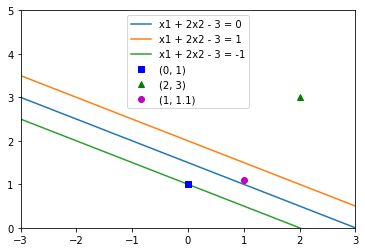

In [4]:
# 2. Plot the points together with three decision lines.
# plot lines again

plt.plot(list_array, y1, '-', label="x1 + 2x2 - 3 = 0")
plt.plot(list_array, y2, '-', label="x1 + 2x2 - 3 = 1")
plt.plot(list_array, y3, '-', label="x1 + 2x2 - 3 = -1")
plt.legend()

# plot three points (0,1), (2,3), (1, 1.1)
plt.plot(0, 1, 'bs', label="(0, 1)")
plt.plot(2, 3, 'g^', label="(2, 3)")
plt.plot(1, 1.1, 'mo', label="(1, 1.1)")

plt.xlim([-3, 3])
plt.ylim([0, 5])
plt.legend()

### Training objective
Let's explore how does the magnitude of parameters affect the margin.

(0.0, 5.0)

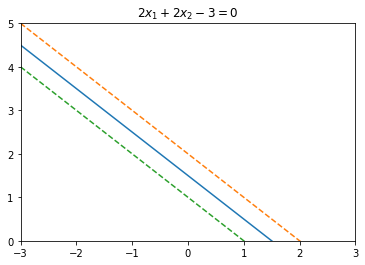

In [5]:
# In the previous model, increase w1 from 1 to 2,
# and plot the new decision margin.
# lines are: 2 * x1 + 2 * x2 - 3 = (0, 1, -1)

# plot 2 * x1 + 2 * x2 - 3 = 0
# x2 = ( 3 - 2 * x1 ) / 2
x = np.linspace(-3, 3, 100)
y1 = (3 - 2*x)/2
plt.plot(x,y1)
y2 = (4 -2*x)/2
plt.plot(x, y2, "--")
y3 = (2 - 2*x)/2
plt.plot(x, y3, "--")
plt.title(r"$2x_1 + 2x_2 - 3 = 0$")
plt.xlim([-3, 3])
plt.ylim([0, 5])

(0.0, 5.0)

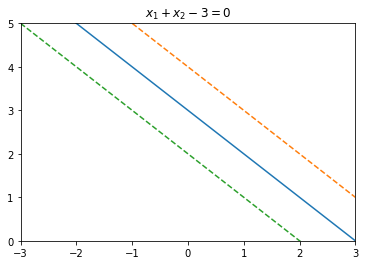

In [6]:
# Decrease w2 from 2 to 1 from the original model,
# and plot the new decision margin.

# plot 1 * x1 + 1 * x2 - 3 = 0
# x2 = 3 - x1
x = np.linspace(-3, 3, 100)
y1 = (3 - x)
plt.plot(x,y1)
y2 = (4 -x)
plt.plot(x, y2, "--")
y3 = (2 - x)
plt.plot(x, y3, "--")
plt.title(r"$x_1 + x_2 - 3 = 0$")
plt.xlim([-3, 3])
plt.ylim([0, 5])

(0.0, 5.0)

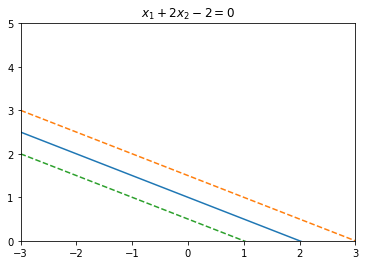

In [7]:
# Change b from -3 to -2 from the original model,
# and plot the new decision margin

# plot 1 * x1 + 2 * x2 - 2 = 0
# x2 = (2 - x1) / 2
x = np.linspace(-3, 3, 100)
y1 = (2 - x) / 2
plt.plot(x,y1)
y2 = (3 -x) / 2
plt.plot(x, y2, "--")
y3 = (1 - x) / 2
plt.plot(x, y3, "--")
plt.title(r"$x_1 + 2x_2 - 2 = 0$")
plt.xlim([-3, 3])
plt.ylim([0, 5])

**How does each parameter affect the width of decision margin?**
- smaller w_1 -> wider gap; larger w_1 -> narrower gap.
- smaller w_2 -> wider gap; larger w_2 -> narrower gap.
- b does not affect the width of the gap.

**(Hard margin) linear SVM classifier objective function**:

\begin{equation}
\begin{array}{cc}
\textit{minimize}_{w_1, w_2, b} & \frac{1}{2}(w_1^2 + w_2^2)\\
\textit{subject to} & y^{(i)}(w_1x_1^{(i)} + w_2x_2^{(i)} + b) \ge 1 \textit{ for all } i=1,...,m.
\end{array}
\end{equation}

- The factor 1/2 is used in the objective function only to make its partial derivatives simpler. (What are its partial derivatives?)
- Constraints will make sure that all data points will be placed on the correct side of the gap (thus called hard margin).
- If $y=1$, the model requires that $w_1x_1 + w_2x_2 + b \ge 1$.
- If $y=-1$, the model requires that $w_1x_1 + w_2x_2 + b \le -1$.
- The objective function has nice properties: 1) it can be computed efficiently, 2) its partial derivates are even simpler, 3) it is a convex function.
- However, the existence of the linear constraints are annoying: gradient descent may violate some constraint during parameter update.

<img src="https://github.com/ch00226855/CMP464-788-Spring2019/raw/master/Data/SVM3.png">

## Solve the Hard-Margin Cost Function
The presence of the constraints makes it difficult to use gradient-based methods to minimize the cost function. We can introduce **Lagrange multiplier** to transform it to an equivalent optimization problem:

$$\min_{w_1, w_2, b, \lambda_i}\frac{1}{2}(w_1^2 + w_2^2) + \sum_i\lambda_i \big[y^{(i)}(w_1x_1^{(i)} + w_2x_2^{(i)} + b) - 1\big]$$
$$\textit{subject to    }\lambda_i\ge 0, i=1,...,m.$$

- If for some $w_1, w_2, b$, there exists a data instance $(x^{(i)}, y^{(i)})$ that violates the constraint $y^{(i)}(w_1x_1^{(i)} + w_2x_2^{(i)} + b) \ge 1$, then the value of the objective function can always gets smaller by increasing the corresponding $\lambda_i$. In other words, the value of $w_1, w_2, b$ at the minimum point will satisfy all the original constraints.
- The objective function is a convex function, so it has a unique local minimum point.
- If there is no constraints, then the global minimum can be easily found by setting the derivates to zero.
- For every data instance $(x^{(i)}, y^{(i)})$ that $y^{(i)}(w_1x_1^{(i)} + w_2x_2^{(i)} + b) > 1$, the corresponding $\lambda_i$ must be zero to achieve the minimum.
- A naive approach is to first guess which $\lambda_i$'s are zero, then solve the problem and verify if the solution is admissible, and (if not) repeat. A better approach will be introduced in the next section.



### Drawbacks of Hard Margin SVM
If we strictly impose that all instances be off the street and on the correct side, the model can only be applied to models that are linearly separable. Moreover, it will be very sensitive to outliers. The above figure illustrates how badly one outlier may affect the model.

To avoid these issues, it is preferable to use a more flexible model. The objective is to find a good balance between keeping the street as wide as possible and limiting the margin violations. This is called *soft margin classification*.

## Task 2: Linear SVM with Soft Margin
- Each data example has two features: $x_1$ and $x_2$.
- Binary classification: target value $y = 1$ means that the instance belongs to "class 1", $y = -1$ means that the instance belongs to "class -1".
- Classes are **mostly** linearly separable: **with a few exceptions**, the two classes can be separrated with a straight line.
- The goal is to find a straight line that best separates the two classes. **Mis-classifications are allowed, but each mis-classification will add a cost to the model.**
- The objective function takes into account both **the magnitude of w's (how wide the gap is) and the degree of margin violations**.

<img src="https://github.com/ch00226855/CMP464-788-Spring2019/raw/master/Data/SVM4.jpg" width="600">

In [8]:
# # How does the penalty work?
# # Assume that the decision boundary is given by w1=1, w2=2, b=3.
# w1, w2, b = 1, 2, 3
# x1s = np.linspace(-5, 5, 100)
# # the decision boundary is given by w1 * x1 + w2 * x2 + b = 0
# # THis means x2 = (-b - w1 * x1) / w2
# x2s = (-b - w1 * x1s) / w2
# plt.plot(x1s, x2s, 'b-')

# # Assume that there is a point on the wrong side of the boundary
# x1 = 2
# x2 = 2
# C = 100.0
# print("Point:", x1, x2)
# print("C:", C)
# # what is the sign of w1*x1 + w2*x2 + b?
# print(w1 * x1 + w2 * x2 + b)
# # 13 --> positive --> this SVM will predict class 1
# plt.plot(x1, x2, 'gs')
# plt.xlim(-4, 4)
# plt.ylim(-4, 4)
# # Assume its actual class is -1.
# y = -1
# # Look at the penalty term : max (0, 1 - y * (w1*x1 + w2*x2 + b))
# print(y * (w1*x1 + w2*x2 + b))
# print('Penalty', C * np.max([0, 1 - y * (w1*x1 + w2*x2 + b)]))

### Model
With parameters $w_1(\ge 0)$, $w_2$, and $b$:
- $w_1x_1 + w_2x_2 + b = 0$ represents the line in the middle of the gap.
- $w_1x_1 + w_2x_2 + b = 1$ represents the right boundary of the gap.
- $w_1x_1 + w_2x_2 + b = -1$ represents the left boundary of the gap.

### Cost Function

$J(w_1, w_2, b)$
$= \frac{1}{2}(w_1^2+w_2^2) + C
\sum_{i=1}^m\max(0, 1-y^{(i)}(w_1x_1^{(i)}+w_2x_2^{(i)}+b))$

- The first sum in the cost function will push the model to have small weights, leading to a larger margin.
- The second sum computes the total of all margin violations. An instance's margin violation is equal to 0 if it is located off the street and on the correct side, or else it is proportional to the distance to the correct side of the street.
- Minimizing this term ensures that the model makes the margin violations as small and as few as possible.

### Hinge loss function
The function $\max(0, 1-t)$ used in the above cost function is called the *hinge loss* function.
- It is equal to 0 when $t\ge 1$.
- Its derivative (slope) is equal to 0 if $t>1$.
- Its derivative (slope) is equal to -1 if $t<1$.
- It is a convex function.

Text(0.5, 1.0, 'Hinge Loss Function')

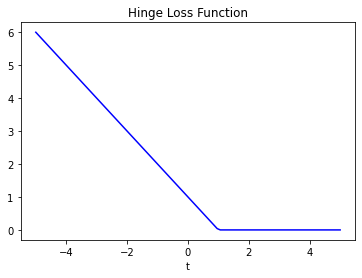

In [9]:
# plot the graph of the hinge loss function.
t = np.linspace(-5, 5, 100)
y = [np.max([0, 1-x]) for x in t]
plt.plot(t, y, 'b-')
plt.xlabel('t')
plt.title("Hinge Loss Function")

### Advantages of Soft Margin SVM
- The dataset does not have to be linearly separable.
- Outliers does not affect the model too much.
- The cost function is convex and it has no constraints, thus gradient descent can be applied to its minimization.

## Relationship with Logistic Regression
The hinge loss function used in soft margin SVM is actually very close to the log-likelihood function $\log(1 + e^{-t})$ in logistic regression. Therefore, soft margin SVM can be considers as logistic regression with L2 regularization.

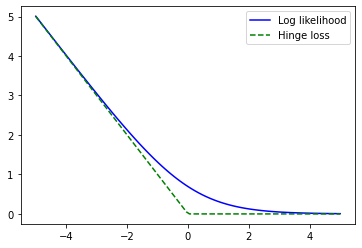

In [10]:
# Graph of y = log(1 + e^{-t})
t = np.linspace(-5, 5, 100)
y = [np.log(1 + np.exp(-x)) for x in t]
plt.plot(t, y, 'b-', label='Log likelihood')
y2 = [np.max([0, -x]) for x in t]
plt.plot(t, y2, 'g--', label='Hinge loss')
plt.legend()

## Task 3: Multi-variable Linear SVM with Soft Margin
### Assumptions
- Each data example has $n$ features: $\textbf{x} = (X_1, X_2, ..., X_n)^T$.
- Binary classification: target value $y = 1$ means that the instance belongs to "class 1", $y = -1$ means that the instance belongs to "class -1".
- Classes are **mostly** linearly separable: **with a few exceptions**, the two classes can be separrated with a straight line.
- The goal is to find a **hyperplane** that best separates the two classes. **Mis-classifications are allowed, but each mis-classification will add a cost to the model.**
- The objective function takes into account both **the magnitude of w's (how wide the gap is) and the degree of margin violations**.

### Model
With parameters $\textbf{w} = (w_1, w_2, ..., w_n)^T$  and $b$:
- $\textbf{w}^T\cdot \textbf{x} + b = 0$ represents the line in the middle of the gap.
- $\textbf{w}^T\cdot \textbf{x} + b = 1$ represents the one boundary of the gap.
- $\textbf{w}^T\cdot \textbf{x} + b = -1$ represents the another boundary of the gap.

### Objective function

$J(\textbf{w}, b)$
$= \frac{1}{2}(\textbf{w}^T\cdot \textbf{w}) + C
\sum_{i=1}^m\max(0, 1-y^{(i)}(\textbf{w}^T\cdot \textbf{x}^{(i)}+b))$

- The first sum in the cost function will push the model to have small weights, leading to a larger margin.
- The second sum computes the total of all margin violations. An instance's margin violation is equal to 0 if it is located off the street and on the correct side, or else it is proportional to the distance to the correct side of the street.
- Minimizing this term ensures that the model makes the margin violations as small and as few as possible.

### Decision rule
The model will predict $y=1$ if $\textbf{w}^T\cdot\textbf{x}+b > 0$; it will predict $y=-1$ if $\textbf{w}^T\cdot\textbf{x}+b < 0$.

## Tuning Linear SVM
- Feature scaling: are all features distributed similarly?
- $C$: how much does penalty matter?
- Class weights: are all classes equally important?
- Multiple classes: One vs. One, or One vs. Rest?

## Linear SVM for Regression
SVM can also be used to build a regressor.
- (Linear) SVM regression aims to find a linear function $f(\textbf{x})$ such that $f(\textbf{x}^{(i)}) - y^{(i)}$ lies between 1 and -1..
- How can we define a hard-margin SVM regressor?
- How can we define a soft-margin SVM regressor?